<a href="https://colab.research.google.com/github/charlieswb/Learning/blob/master/Tensorflow/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Mock up data

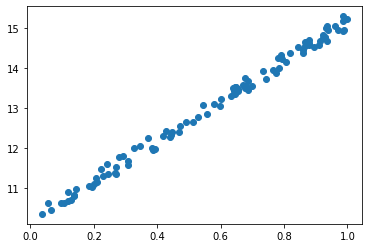

In [8]:
N = 100
X = np.random.rand(N)
Y = 5 * X + 10 + 0.4 * np.random.rand(N)
plt.scatter(X,Y)
plt.show()

In [4]:
W = tf.Variable(0, dtype='float32')
b = tf.Variable(0, dtype='float32')
lr = 0.1 # learning rate

In [ ]:
for epoch in range(1000):
  with tf.GradientTape() as tape:
    y = W * X + b
    loss = tf.reduce_mean(tf.square(y - Y))
  dW, db = tape.gradient(loss, [W, b]) # de/dW, de/db
  W.assign_sub(lr * dW)
  b.assign_sub(lr * db)
  if (epoch + 1) % 50 == 0:
    print(epoch+1, W.numpy(), b.numpy(), loss.numpy())

50 5.011613 10.196576 0.013271309
100 5.027519 10.188827 0.013205389
150 5.0359864 10.184695 0.0131866895
200 5.0404944 10.182496 0.0131814135
250 5.0428953 10.181325 0.013179891
300 5.044172 10.180702 0.013179477
350 5.0448503 10.180372 0.01317935
400 5.0452104 10.180195 0.013179326
450 5.0454035 10.180101 0.013179313
500 5.0455055 10.18005 0.013179319
550 5.0455627 10.180024 0.013179313
600 5.045589 10.180012 0.01317932
650 5.0455976 10.180008 0.013179314
700 5.0455976 10.180008 0.013179314
750 5.0455976 10.180008 0.013179314
800 5.0455976 10.180008 0.013179314
850 5.0455976 10.180008 0.013179314
900 5.0455976 10.180008 0.013179314
950 5.0455976 10.180008 0.013179314
1000 5.0455976 10.180008 0.013179314


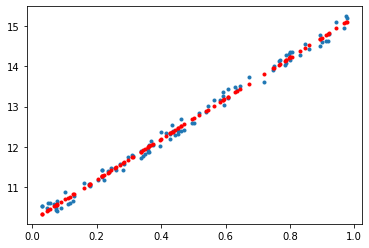

In [ ]:
Z = W * X + b
plt.plot(X, Y, '.')
plt.plot(X, Z, '.r')
plt.show()

Using Keras

In [5]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense

In [6]:
inputs = Input(shape=(1,))
dense = Dense(1)
outputs = dense(inputs)

In [7]:
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

In [9]:
model.fit(X, Y, batch_size=N, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 172.2374
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 91.8586
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 49.0055
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 26.1586
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 13.9775
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.4828
Epoch 7/1000
1/1 [==============================] - 0s 974us/step - loss: 4.0196
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.1727
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.1875
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6617
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3808
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2305
Epoch 13/1000
1/1 [======================

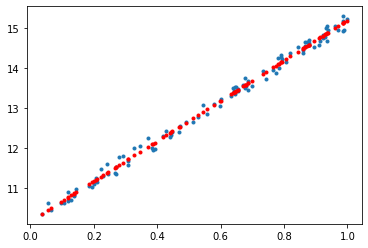

In [10]:
Z = model.predict(X)
plt.plot(X, Y, '.')
plt.plot(X, Z, '.r')
plt.show()